**Predictive Analytics: Klasifikasi Obesitas (Underweight, Normal, Overweight, Obese)**

---


**Evi Afiyatus Solihah - MC299D5X1752**

**Latar Belakang Proyek: Prediksi Tingkat Obesitas Menggunakan Machine Learning**

Obesitas merupakan masalah kesehatan global yang terus meningkat dan berkontribusi terhadap berbagai penyakit kronis seperti diabetes, hipertensi, dan penyakit jantung. Deteksi dan klasifikasi tingkat obesitas secara dini menjadi penting untuk mendukung pencegahan dan penanganan yang tepat. Dengan kemajuan teknologi, khususnya machine learning, kini analisis data kesehatan dapat dilakukan secara cepat dan akurat. Melalui pemanfaatan data seperti usia, jenis kelamin, indeks massa tubuh (IMT), dan aktivitas fisik, model machine learning mampu memprediksi kategori obesitas seseorang, seperti underweight, normal, overweight, atau obese.

Proyek ini bertujuan untuk membangun model prediktif berbasis machine learning yang mampu mengklasifikasikan tingkat obesitas seseorang secara otomatis. Berbagai algoritma klasifikasi digunakan dalam pengembangan model ini, antara lain Random Forest, K-Nearest Neighbors (KNN), dan Support Vector Machine (SVM). Selain itu, proyek ini juga mengevaluasi performa masing-masing model dalam konteks klasifikasi multi-kelas.

## Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

## Load Dataset

Load dataset merupakan proses memasukkan data dari sumber eksternal seperti file CSV ke dalam lingkungan kerja seperti Google Colab. Data biasanya dimuat ke dalam bentuk DataFrame menggunakan pustaka pandas agar bisa digunakan untuk analisis, visualisasi, atau pelatihan model machine learning. Langkah ini dilakukan di awal agar seluruh data tersedia dan siap digunakan dalam proses selanjutnya.

**Informasi Dataset**

| **Field** | **Value** |
|---------- |-----------|
| **Title** |Obesity prediction           |
|**Source**| Kaggle                                                                    |
| **Maintainer**   | MrSimple07                                                  |
| **License**      | Other (specified in description)                                          |
| **Visibility**   | Publik                                                                    |
| **Tags**         | Health, Health Conditions |
| **Usability**    | 10.00     




In [2]:
# Import module yang disediakan google colab untuk kebutuhan upload file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"eviafiyatus","key":"1c589be636b2247f76c6e97cf60fd0df"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Download kaggle dataset and unzip the file
# !cp kaggle.json ~/.kaggle/

# !chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mrsimple07/obesity-prediction
!unzip obesity-prediction.zip

Dataset URL: https://www.kaggle.com/datasets/mrsimple07/obesity-prediction
License(s): apache-2.0
obesity-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  obesity-prediction.zip
replace obesity_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: obesity_data.csv        


In [5]:
df_predict = pd.read_csv('obesity_data.csv')
df_predict

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight
...,...,...,...,...,...,...,...
995,18,Male,155.588674,64.103182,26.480345,4,Overweight
996,35,Female,165.076490,97.639771,35.830783,1,Obese
997,49,Female,156.570956,78.804284,32.146036,1,Obese
998,64,Male,164.192222,57.978115,21.505965,4,Normal weight


Pada dataset ini terdapat 7 kolom. yaitu:

*   **Age** : Merepresentasikan Usia
*   **Gender** : Jenis Kelamin
*   **Height** : Tinggi Badan
*   **Weight** : Berat Badan
*   **BMI** : Indeks Massa Tubuh, ukuran proporsi berat dan tinggi badan
*   **PhysicalActivityLevel** : Tingkat aktivitas fisik sehari-hari
*   **ObesityCategory** : Kategori obesitas (misal: Normal weight, Overweight, obese, Underweight)

## Exploratory Data Analysis - Deskripsi Variabel

Pada tahap ini dilakukan pengecekan missing value, outlier, dan data duplikat, sekaligus penanganannya.

In [6]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


Berdasarkan hasil eksekusi method df.info(), terdapat 2 kolom bertipe data numerik integer, yaitu Age dan PhysicalActivityLevel. Selain itu, terdapat 2 kolom bertipe data objek, yaitu Gender dan ObesityCategory. Terakhir, ada 3 kolom bertipe data float64, yaitu Height, Weight, dan BMI.

In [7]:
df_predict.describe()

,Age,Height,Weight,BMI,PhysicalActivityLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,170.052417,71.205769,24.888317,2.534000
std,18.114267,10.309971,15.509849,6.193912,1.116284
min,18.000000,136.115719,26.065730,8.470572,1.000000
25%,35.000000,163.514205,61.129629,20.918068,2.000000
50%,50.000000,169.801665,71.929072,24.698647,3.000000
75%,66.000000,177.353596,81.133746,28.732132,4.000000
max,79.000000,201.419670,118.907366,50.791898,4.000000


In [8]:
df_predict.shape

(1000, 7)

Berdasarkan hasil eksekusi method df.shape, terdapat 1000 baris dan 7 kolom

## Exploratory Data Analysis Menangani Missing Value

Menghitung jumlah nilai yang hilang (missing values) di setiap kolom pada DataFrame df_predict

In [9]:
df_predict.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
PhysicalActivityLevel,0
ObesityCategory,0


Menghitung Jumlah baris data yang duplikat di dalam DataFrame df_predict

In [10]:
df_predict.duplicated().sum()

0

Menghitung proporsi atau persentase masing-masing kategori dalam kolom ObesityCategory pada DataFrame df_predict.

In [11]:
df_predict.ObesityCategory.value_counts(normalize=True)

,proportion
ObesityCategory,
Normal weight,0.371
Overweight,0.295
Obese,0.191
Underweight,0.143


Membuat boxplot untuk melihat distribusi dan outlier pada kolom Age.

<Axes: xlabel='Age'>

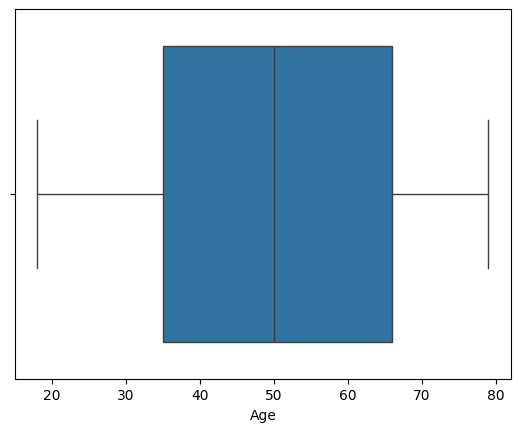

In [12]:
sns.boxplot(x=df_predict['Age'])

Membuat boxplot untuk melihat distribusi dan outlier pada kolom BMI.

<Axes: xlabel='BMI'>

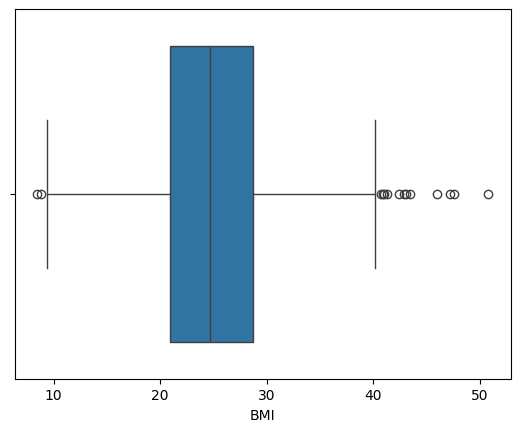

In [13]:
sns.boxplot(x=df_predict['BMI'])

Membuat boxplot untuk melihat distribusi dan outlier pada kolom Weight.

<Axes: xlabel='Weight'>

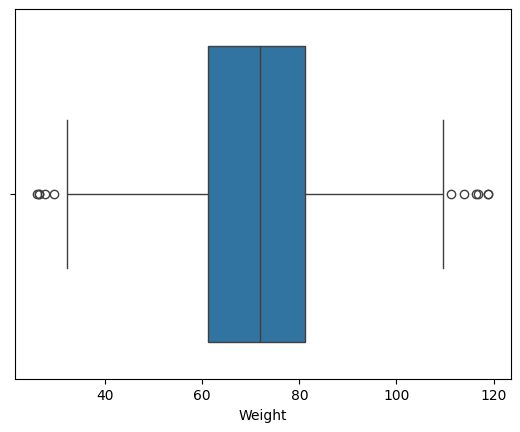

In [14]:
sns.boxplot(x=df_predict['Weight'])

Membuat boxplot untuk melihat distribusi dan outlier pada kolom Height.

<Axes: xlabel='Height'>

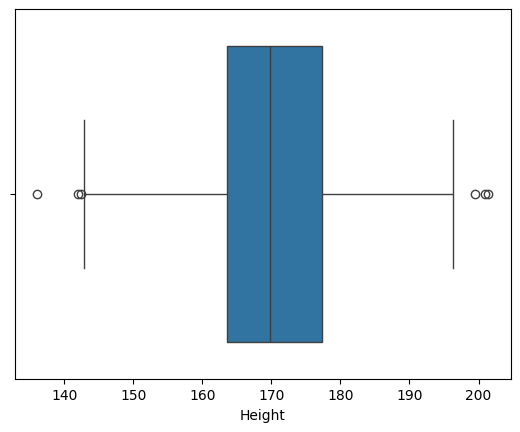

In [15]:
sns.boxplot(x=df_predict['Height'])

Menghapus outliers yang ada pada dataset

In [16]:
# Ambil hanya kolom numerikal
numeric_cols = df_predict.select_dtypes(include='number').columns
# Hitung Q1, Q3, dan IQR hanya untuk kolom numerikal
Q1 = df_predict[numeric_cols].quantile(0.25)
Q3 = df_predict[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
# Buat filter untuk menghapus baris yang mengandung outlier di kolom numerikal
filter_outliers = ~((df_predict[numeric_cols] < (Q1 - 1.5 * IQR)) |
                    (df_predict[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
# Terapkan filter ke dataset asli (termasuk kolom non-numerikal)
df_predict = df_predict[filter_outliers]
# Cek ukuran dataset setelah outlier dihapus
df_predict.shape

(974, 7)

Setelah outlier dihapus, dataset berisi 974 baris dan 7 kolom.

In [17]:
mapping = {
    'Underweight': 1,
    'Normal weight': 2,
    'Overweight': 3,
    'Obese': 4
}

df_predict['ObesityCategory_num'] = df_predict['ObesityCategory'].map(mapping)

<ipython-input-17-d9dd09cfc2dd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict['ObesityCategory_num'] = df_predict['ObesityCategory'].map(mapping)


## Exploratory Data Analysis - Univariate Analysis

Mengelompokkan data menjadi numerik dan kategorikal.

In [18]:
numerical_features = ['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel', 'ObesityCategory_num']
categorical_features = ['Gender', 'ObesityCategory']

        jumlah sampel  persentase
Gender                           
Male              508        52.2
Female            466        47.8


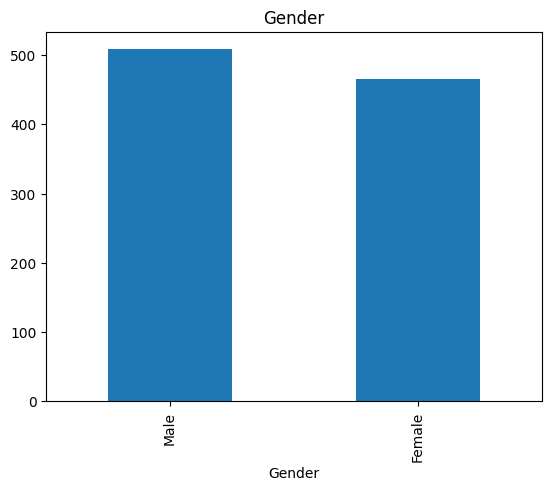

In [19]:
# Fitur Gender
feature = categorical_features[0]
count = df_predict[feature].value_counts()
percent = 100*df_predict[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

                 jumlah sampel  persentase
ObesityCategory                           
Normal weight              371        38.1
Overweight                 293        30.1
Obese                      175        18.0
Underweight                135        13.9


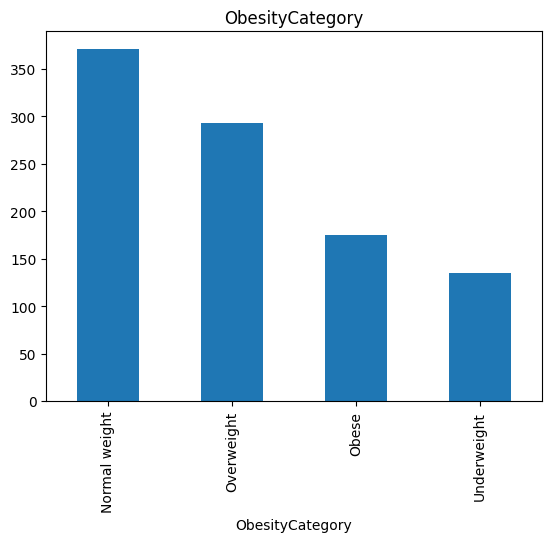

In [20]:
# Fitur ObesityCategory
feature = categorical_features[1]
count = df_predict[feature].value_counts()
percent = 100*df_predict[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

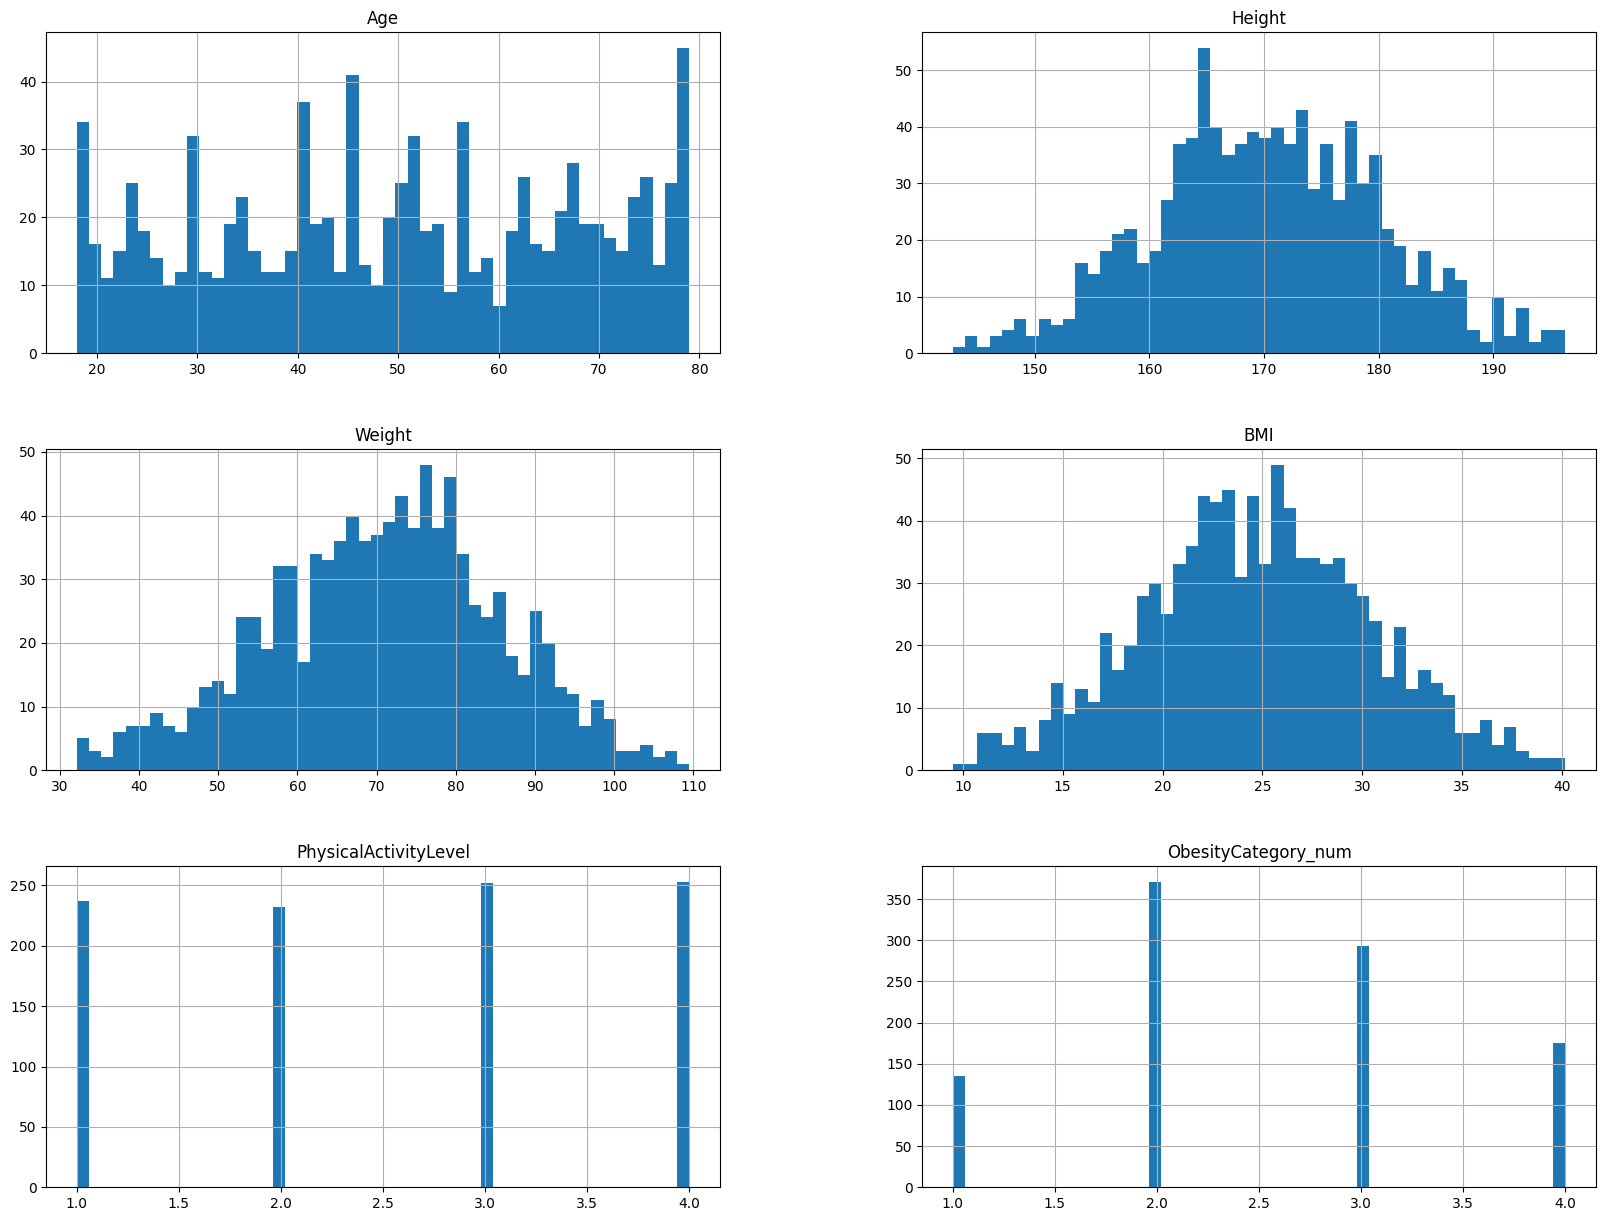

In [21]:
df_predict.hist(bins=50, figsize=(20,15))
plt.show()

## Exploratory Data Analysis - Multivariate Analysis

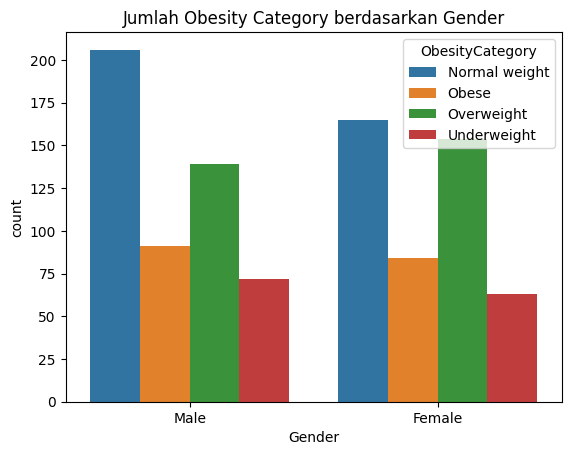

In [22]:
# Categorixal Features
sns.countplot(data=df_predict, x='Gender', hue='ObesityCategory')
plt.title("Jumlah Obesity Category berdasarkan Gender")
plt.show()

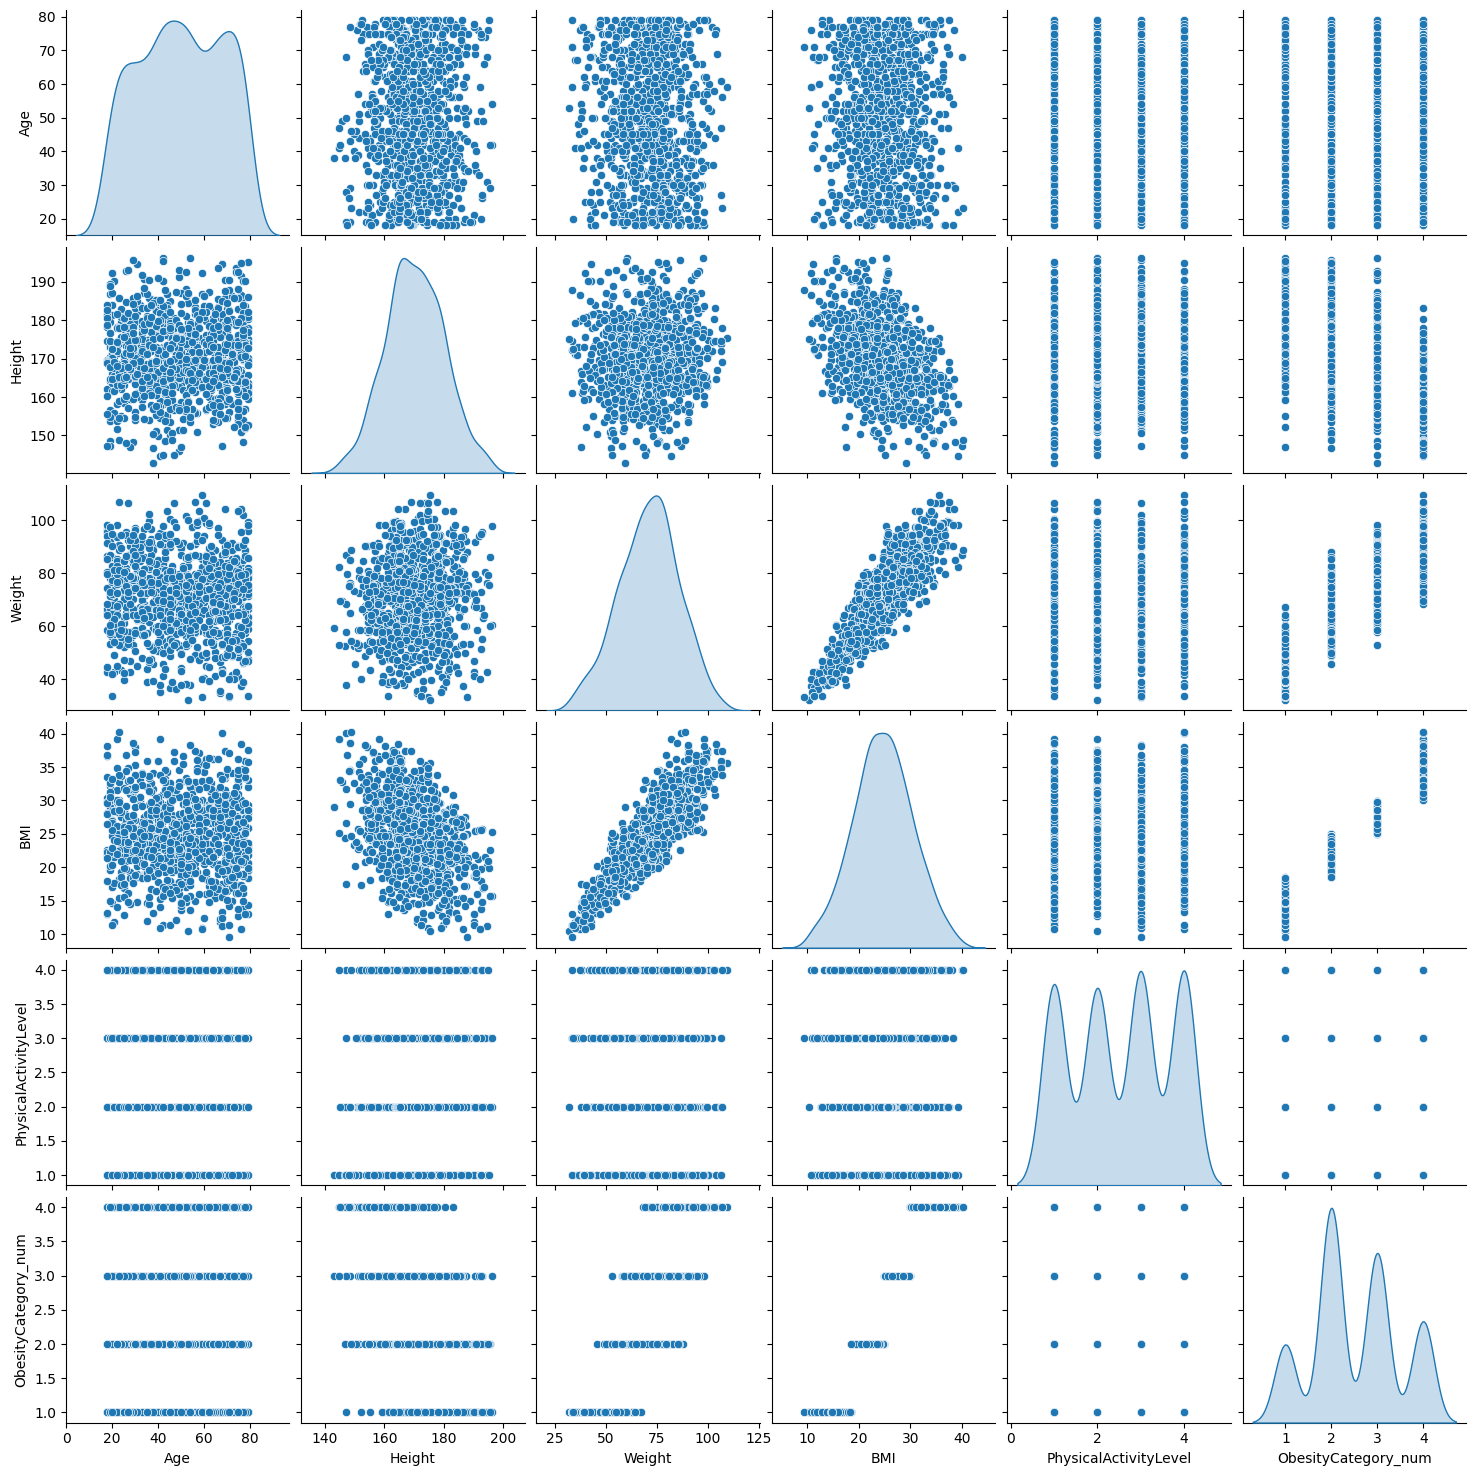

In [23]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df_predict, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

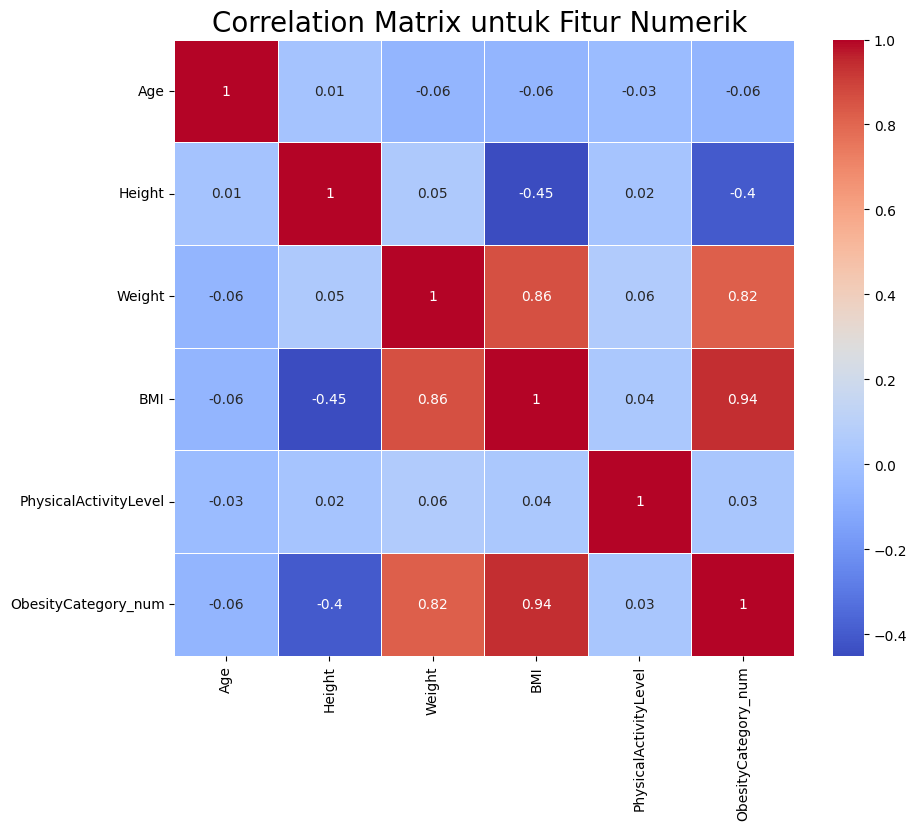

In [24]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_predict[numerical_features].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Reduksi PCA dilakukan pada kolom Weight dan BMI karena keduanya memiliki nilai korelasi yang cukup tinggi, yang menunjukkan adanya hubungan erat antara kedua fitur tersebut.

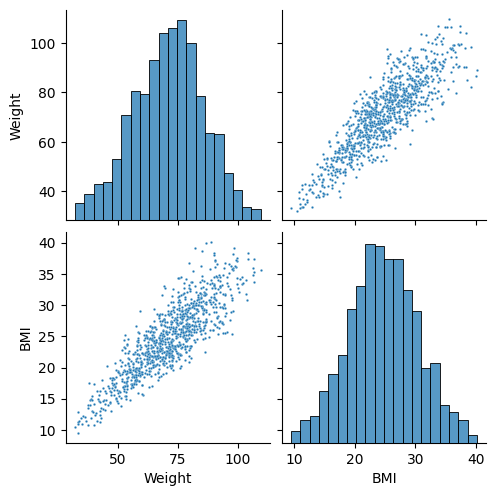

In [25]:
# Reduksi Dimensi dengan PCA
sns.pairplot(df_predict[['Weight','BMI']], plot_kws={"s": 3});

In [26]:
pca = PCA(n_components=2, random_state=123)
pca.fit(df_predict[['Weight','BMI']])
princ_comp = pca.transform(df_predict[['Weight','BMI']])

In [27]:
pca.explained_variance_ratio_.round(3)

array([0.97, 0.03])

In [28]:
pca = PCA(n_components=1, random_state=123)
pca.fit(df_predict[['Weight','BMI']])
df_predict['Weight_BMI_Combined'] = pca.transform(df_predict.loc[:, ('Weight','BMI')]).flatten()
df_predict.drop(['Weight','BMI'], axis=1, inplace=True)

<ipython-input-28-a72cdc7c613f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict['Weight_BMI_Combined'] = pca.transform(df_predict.loc[:, ('Weight','BMI')]).flatten()
<ipython-input-28-a72cdc7c613f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict.drop(['Weight','BMI'], axis=1, inplace=True)


In [29]:
df_predict.head()

,Age,Gender,Height,PhysicalActivityLevel,ObesityCategory,ObesityCategory_num,Weight_BMI_Combined
0,56,Male,173.575262,4,Normal weight,2,0.681025
1,69,Male,164.127306,2,Obese,4,20.776964
2,46,Female,168.072202,4,Overweight,3,2.206961
3,32,Male,168.459633,3,Overweight,3,14.844851
4,60,Male,183.568568,3,Normal weight,2,-3.212931


## Data Preparation

Mengubah kategori ObesityCategory menjadi angka dan menyimpannya di kolom baru.

In [30]:
mapping = {
    'Underweight': 1,
    'Normal weight': 2,
    'Overweight': 3,
    'Obese': 4
}

df_predict['ObesityCategory_num'] = df_predict['ObesityCategory'].map(mapping)

<ipython-input-30-d9dd09cfc2dd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict['ObesityCategory_num'] = df_predict['ObesityCategory'].map(mapping)


In [31]:
df_predict

,Age,Gender,Height,PhysicalActivityLevel,ObesityCategory,ObesityCategory_num,Weight_BMI_Combined
0,56,Male,173.575262,4,Normal weight,2,0.681025
1,69,Male,164.127306,2,Obese,4,20.776964
2,46,Female,168.072202,4,Overweight,3,2.206961
3,32,Male,168.459633,3,Overweight,3,14.844851
4,60,Male,183.568568,3,Normal weight,2,-3.212931
...,...,...,...,...,...,...,...
995,18,Male,155.588674,4,Overweight,3,-5.919172
996,35,Female,165.076490,1,Obese,4,28.831709
997,49,Female,156.570956,1,Obese,4,9.826307
998,64,Male,164.192222,4,Normal weight,2,-13.333629


Encoding Fitur Kategori Kolom Gender

In [32]:
df_predict = pd.concat([df_predict, pd.get_dummies(df_predict['Gender'], prefix='Gender')],axis=1)
df_predict.drop(['Gender'], axis=1, inplace=True)
df_predict.head()

,Age,Height,PhysicalActivityLevel,ObesityCategory,ObesityCategory_num,Weight_BMI_Combined,Gender_Female,Gender_Male
0,56,173.575262,4,Normal weight,2,0.681025,False,True
1,69,164.127306,2,Obese,4,20.776964,False,True
2,46,168.072202,4,Overweight,3,2.206961,True,False
3,32,168.459633,3,Overweight,3,14.844851,False,True
4,60,183.568568,3,Normal weight,2,-3.212931,False,True


Membagi data menjadi data latih dan data uji dengan rasio 90:10.

In [33]:
# Train Test Split
X = df_predict.drop(["ObesityCategory"],axis =1)
y = df_predict["ObesityCategory"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [34]:
print(f'Total Dataset : {len(X)}')
print(f'Total Train Dataset: {len(X_train)}')
print(f'Total Test Dataset: {len(X_test)}')

Total Dataset : 974
Total Train Dataset: 876
Total Test Dataset: 98


In [35]:
# Standarsisasi
numerical_features = ['Age', 'Weight_BMI_Combined', 'PhysicalActivityLevel']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Age,Weight_BMI_Combined,PhysicalActivityLevel
324,-0.934965,-0.843370,-1.366364
385,1.270431,-1.093247,1.315342
351,-0.549020,-0.156046,-1.366364
207,-0.218211,0.706865,-0.472462
914,-1.210639,0.491419,0.421440


In [36]:
X_train[numerical_features].describe().round(4)

,Age,Weight_BMI_Combined,PhysicalActivityLevel
count,876.0000,876.0000,876.0000
mean,0.0000,-0.0000,0.0000
std,1.0006,1.0006,1.0006
min,-1.7620,-2.6023,-1.3664
25%,-0.8247,-0.6302,-0.4725
50%,0.0023,0.0352,0.4214
75%,0.8845,0.6714,1.3153
max,1.6012,2.5345,1.3153


In [37]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'SVM', 'LogisticRegression', 'GradientBoosting'])

## Random Forest

In [38]:
model_rf = RandomForestClassifier(max_depth= 20)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20)

In [39]:
# rf_pred = model_rf.predict(X_test)

## K-Nearest Neighbors

In [40]:
model_knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
model_knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [41]:
# knn_pred = model_knn.predict(X_test)

## Support Vector Machine

In [42]:
model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

In [43]:
# svm_pred = model_svm.predict(X_test)

## Evaluasi Model

In [44]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

<ipython-input-44-69700ad92bf9>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.82935225  0.27800325  0.93962205 -0.71442494 -1.21063903 -0.93496453
  0.00232876 -0.82469473 -1.10036923  0.82935225 -1.54144843  0.99475695
 -1.48631353  0.82935225 -1.59658333  0.16773346 -0.65929004  0.16773346
 -1.37604373 -1.54144843 -0.05280614  1.60124084  1.04989185 -0.93496453
  1.16016165 -0.65929004 -1.21063903  0.38827305 -0.38361554  0.55367775
 -0.49388534 -0.43875044  0.11259856 -0.87982963  1.54610594  1.43583614
  0.49854285 -1.10036923  1.38070124  1.60124084 -1.48631353  1.16016165
  1.16016165 -0.05280614 -0.49388534 -1.76198803  0.77421735 -0.54902024
 -0.65929004 -0.87982963  0.77421735 -0.05280614 -0.76955984  0.11259856
 -0.54902024  0.66394755 -0.93496453  0.22286835 -1.32090883  1.43583614
  1.27043144 -0.49388534 -0.82469473 -0.49388534 -0.87982963 -0.49388534
 -0.38361554 -0.60415514 -0.10794104  0.1125

In [45]:
models = {
    'RandomForest': model_rf,
    'KNN': model_knn,
    'SVM': model_svm
}

predictions = {name: model.predict(X_test) for name, model in models.items()}

In [46]:
from sklearn.metrics import accuracy_score

accuracies = {name: accuracy_score(y_test, pred) for name, pred in predictions.items()}
accuracy_df = pd.DataFrame.from_dict(accuracies, orient='index', columns=['accuracy'])

print(accuracy_df)

              accuracy
RandomForest  1.000000
KNN           0.857143
SVM           0.357143


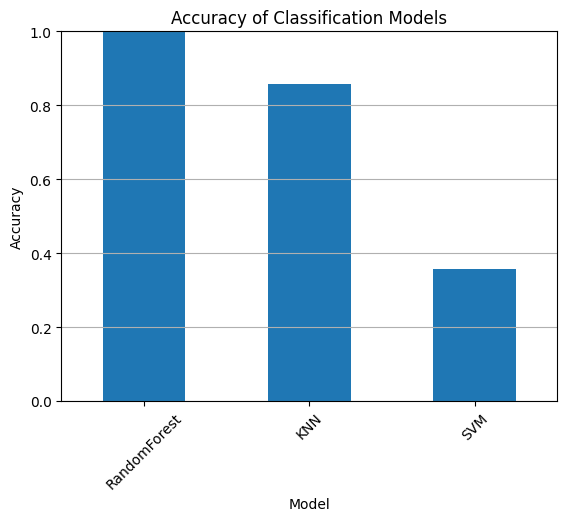

In [47]:
accuracy_df.plot(kind='bar', legend=False)
plt.title('Accuracy of Classification Models')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)  # Karena accuracy antara 0-1
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Melakukan Prediksi

In [48]:
prediksi = X_test.iloc[:5].copy()
pred_dict = {'y_true': y_test.iloc[:5].values}  # label asli 5 baris

for name, model in models.items():
    pred = model.predict(prediksi)
    pred_dict['prediksi_' + name] = pred

result_df = pd.DataFrame(pred_dict)

print(result_df)

          y_true prediksi_RandomForest   prediksi_KNN   prediksi_SVM
0  Normal weight         Normal weight  Normal weight  Normal weight
1  Normal weight         Normal weight  Normal weight  Normal weight
2     Overweight            Overweight     Overweight  Normal weight
3     Overweight            Overweight  Normal weight  Normal weight
4    Underweight           Underweight    Underweight  Normal weight
